In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import rbamlib
from rbamlib.web import omni
from rbamlib.utils import storm_idx

In [2]:
# 1) Define a date range:
start_date = dt.datetime(2013, 10, 1, 0, 0, 0)
end_date   = dt.datetime(2013, 11, 1, 0, 0, 0)

# 2) Retrieve SymH via OMNI data loader:
time, Dst = rbamlib.web.omni(start_date, end_date, params={'Dst'})

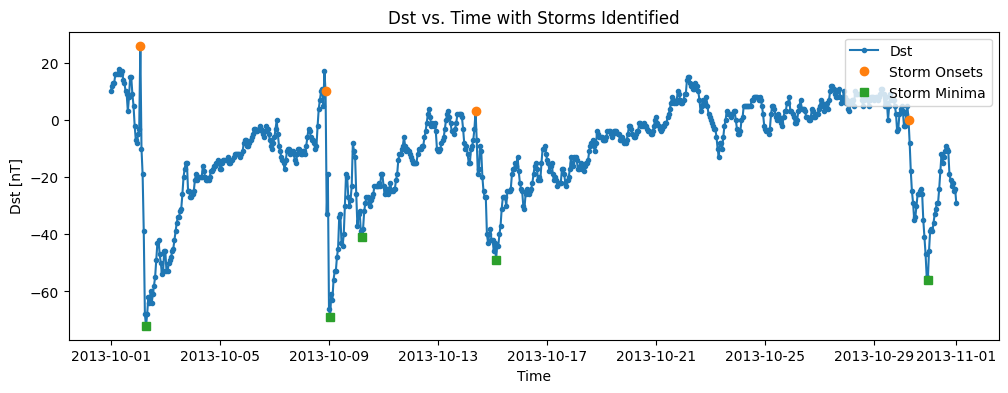

In [16]:
# 3) Identify storms
#    Option A: Return storm "onset" indices
storm_onsets = storm_idx(time, Dst, threshold=-35, gap_hours=6, method='onset')
#    Option B: Return storm "minimum" indices (deepest dip)
storm_mins   = storm_idx(time, Dst, threshold=-35, gap_hours=6, method='minimum')

# 4) Plot the results in matplotlib
fig, ax = plt.subplots(figsize=(12, 4))  # single Axes on a Figure
ax.plot(time, Dst, label="Dst", marker='.')

# Mark the storms found by 'onset'
# (No color or style specified, letting matplotlib choose defaults)
ax.plot(
    np.array(time)[storm_onsets],
    Dst[storm_onsets],
    marker="o",
    ls="none",
    label="Storm Onsets"
)

# Mark the storms found by 'minimum'
ax.plot(
    np.array(time)[storm_mins],
    Dst[storm_mins],
    marker="s",
    ls="none",
    label="Storm Minima"
)

ax.set_title("Dst vs. Time with Storms Identified")
ax.set_xlabel("Time")
ax.set_ylabel("Dst [nT]")
ax.legend(loc='upper right')
plt.show()